In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy import stats

# Подготовительная работа

## Первый Датасет

In [2]:
df = pd.read_csv("ga_hits.csv",low_memory=False)
df.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


CR (Conversion Rate) — показатель конверсии из визита (уникальный 
session_id) в любое целевое действие в рамках одного визита (в случае 
наличия >1 целевого действия — считать все как одно

Одна строка = одно событие в рамках одного визита на сайт.

Описание атрибутов:
 session_id — ID визита;
 hit_date — дата события;
 hit_time — время события;
 hit_number — порядковый номер события в рамках сессии;
 hit_type — тип события;
 hit_referer — источник события;
 hit_page_path — страница события;
 event_category — тип действия;
 event_action — действие;
 event_label — тег действия;
 event_value — значение результата действия.

In [3]:
df.shape

(15726470, 11)

## Второй Датасет

In [4]:
df_1 = pd.read_csv("ga_sessions.csv",low_memory=False)
df_1.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


Одна строка = один визит на сайт.

Описание атрибутов:
~ session_id — ID визита;
~ client_id — ID посетителя;
~ visit_date — дата визита;
~ visit_time — время визита;
~ visit_number — порядковый номер визита клиента;
~ utm_source — канал привлечения;
~ utm_medium — тип привлечения;
~ utm_campaign — рекламная кампания;
~ utm_keyword — ключевое слово;
~ device_category — тип устройства;
~ device_os — ОС устройства;
~ device_brand — марка устройства;
~ device_model — модель устройства;
~ device_screen_resolution — рн~е экрана;
~ device_brand — ма~ка устройства;
~ device_model — мо~ель устройства;
~ device_screen_resolution — р~зрешение экрана;
~ device_~rowoer — браузер;
~ geo-country — страна;
~ geo_city — город.

In [5]:
df_1.shape

(1860042, 18)

## Объединенный Датасет

In [6]:
merged_df = pd.merge(df, df_1, how="inner")
merged_df.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,...,NaN,JajANoFxoqXfKRNBUhzx,desktop,Windows,NaN,NaN,2560x1080,Chrome,Russia,Moscow
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,...,NaN,zXjuoqEaPElBnwpSHMpx,mobile,Android,Samsung,NaN,412x915,Chrome,Russia,Podolsk
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,NaN,1536x864,Chrome,Estonia,Tallinn


In [7]:
merged_df.shape

(15685219, 28)

# Разведочный анализ данных

## Базовая чистка (дубликаты, пустые значения, типизация данных, ненужные атрибуты).

### Дубликаты

In [8]:
df_unique = merged_df.drop_duplicates()
df_unique.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,...,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,NaN,360x780,Chrome,Russia,Saint Petersburg
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,...,NaN,JajANoFxoqXfKRNBUhzx,desktop,Windows,NaN,NaN,2560x1080,Chrome,Russia,Moscow
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,...,NaN,zXjuoqEaPElBnwpSHMpx,mobile,Android,Samsung,NaN,412x915,Chrome,Russia,Podolsk
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,...,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,NaN,1536x864,Chrome,Estonia,Tallinn


### Пропущенные значения

In [9]:
missing_values = ((df_unique.isna().sum() / len(df_unique)) * 100).sort_values(ascending=False)

print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


event_value                 100.000000
device_model                 99.220368
utm_keyword                  58.684721
hit_time                     58.400224
device_os                    58.388614
hit_referer                  39.753975
device_brand                 25.156646
event_label                  23.765572
utm_adcontent                18.057880
utm_campaign                 14.018759
utm_source                    0.004463
session_id                    0.000000
geo_country                   0.000000
device_browser                0.000000
device_screen_resolution      0.000000
device_category               0.000000
visit_number                  0.000000
utm_medium                    0.000000
hit_date                      0.000000
visit_time                    0.000000
visit_date                    0.000000
client_id                     0.000000
event_action                  0.000000
event_category                0.000000
hit_page_path                 0.000000
hit_type                 

<bound method DataFrame.isna of                                          session_id    hit_date   hit_time  \
0         5639623078712724064.1640254056.1640254056  2021-12-23   597864.0   
1         7750352294969115059.1640271109.1640271109  2021-12-23   597331.0   
2          885342191847998240.1640235807.1640235807  2021-12-23   796252.0   
3          142526202120934167.1640211014.1640211014  2021-12-23   934292.0   
4         3450086108837475701.1640265078.1640265078  2021-12-23   768741.0   
...                                             ...         ...        ...   
15685214  6866159858916559617.1640270865.1640270865  2021-12-23   810589.0   
15685215  7310304587364460692.1640261783.1640261783  2021-12-23   904927.0   
15685216  8013702685784312179.1640270195.1640270195  2021-12-23  2172865.0   
15685217  8021505554734405918.1640257821.1640257821  2021-12-23   713325.0   
15685218  1569014437485249865.1640269129.1640269129  2021-12-23   742820.0   

          hit_number hit_type h

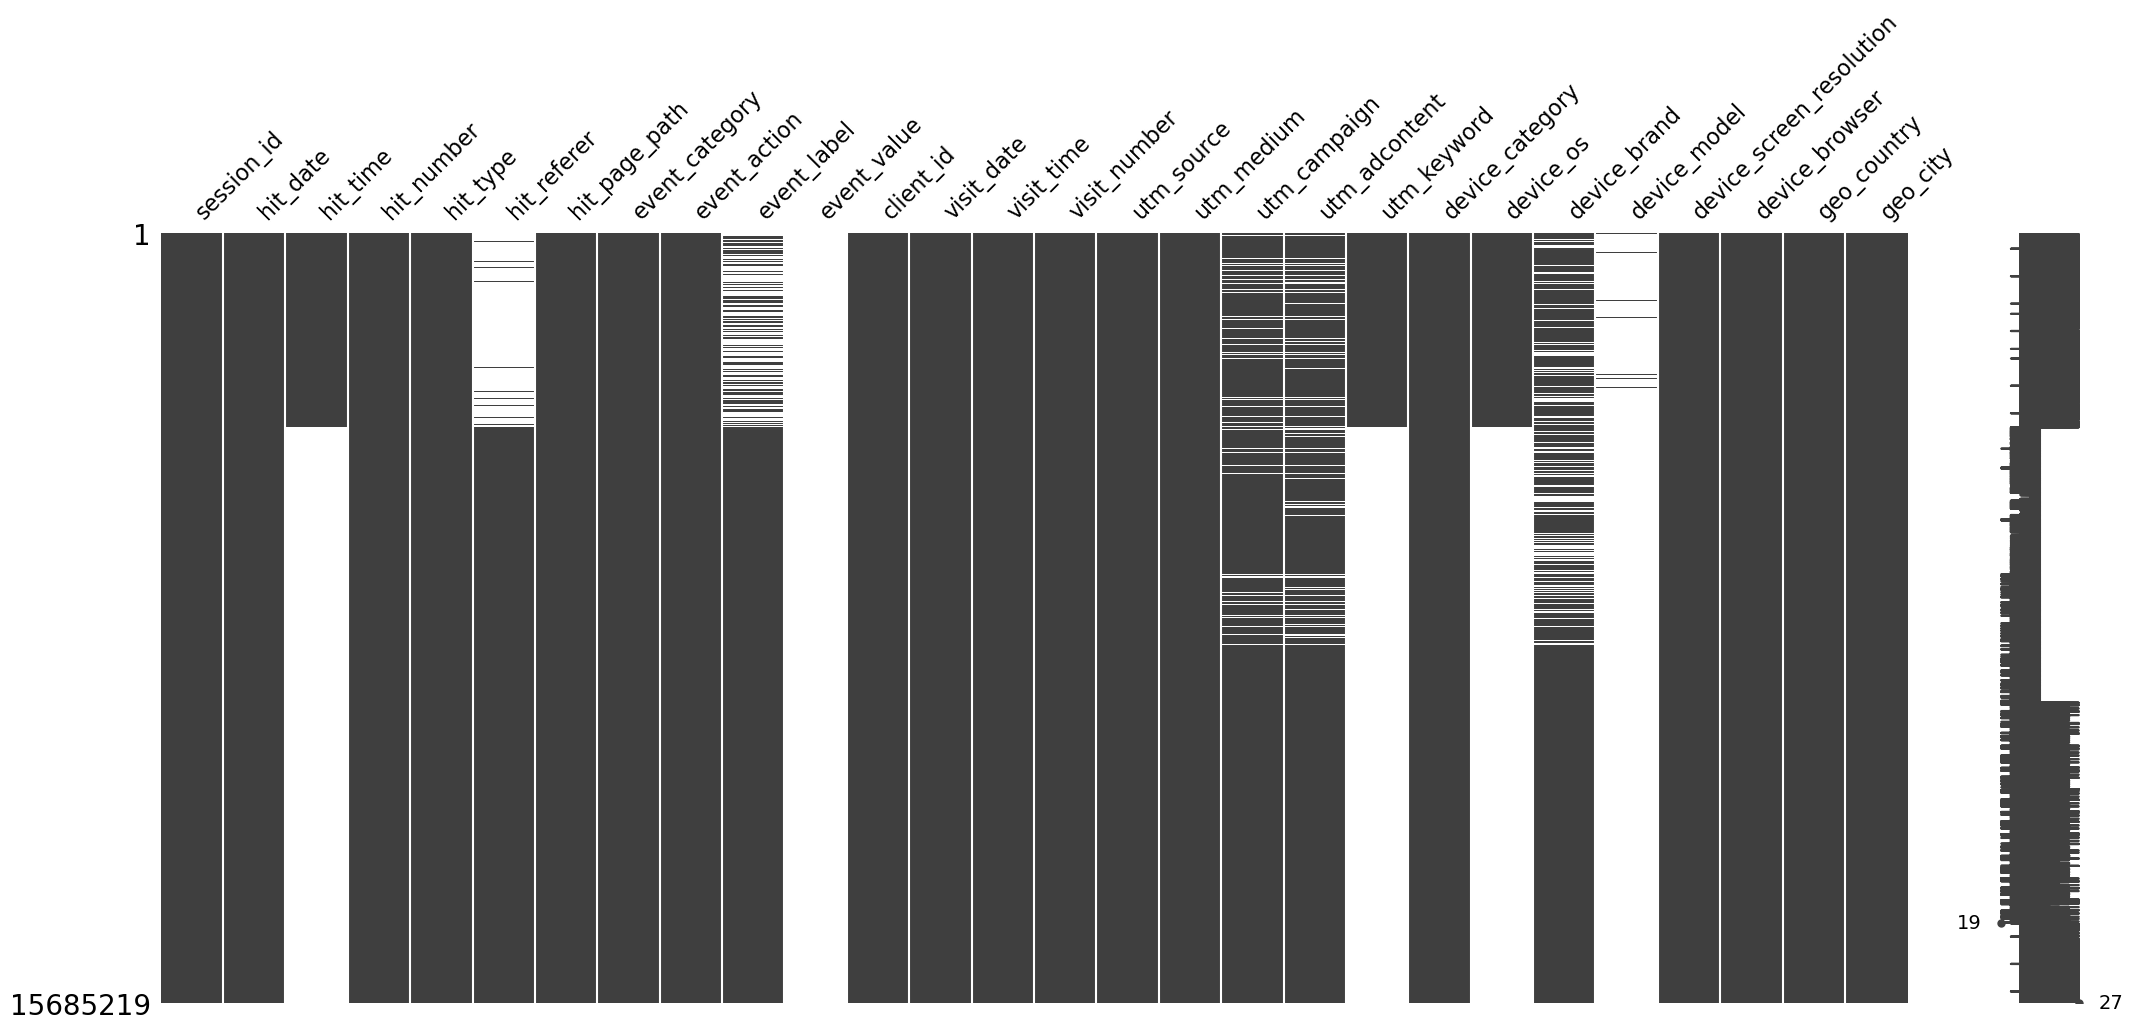

In [10]:
msno.matrix(df_unique)
df_unique.isna

In [11]:
df_1 = df_unique.drop(columns=['event_value', 'device_model'])
df_1.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,...,NaN,NaN,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,360x780,Chrome,Russia,Saint Petersburg
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,...,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,...,NaN,NaN,JajANoFxoqXfKRNBUhzx,desktop,Windows,NaN,2560x1080,Chrome,Russia,Moscow
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,...,NaN,NaN,zXjuoqEaPElBnwpSHMpx,mobile,Android,Samsung,412x915,Chrome,Russia,Podolsk
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,NaN,1536x864,Chrome,Estonia,Tallinn


In [12]:
df_1['utm_keyword'] = df_1['utm_keyword'].fillna('other')
df_1['hit_referer'] = df_1['hit_referer'].fillna('other')
df_1['event_label'] = df_1['event_label'].fillna('other')
df_1['utm_adcontent'] = df_1['utm_adcontent'].fillna('other')
df_1['utm_campaign'] = df_1['utm_campaign'].fillna('other')
df_1['hit_time'] = df_1['hit_time'].fillna('other')
df_1['device_os'] = df_1['device_os'].fillna('other')
df_1['device_brand'] = df_1['device_brand'].fillna('other')

In [13]:
df_clean = df_1.dropna(subset=['utm_source'])
df_clean.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_screen_resolution,device_browser,geo_country,geo_city
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,other,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,other,...,other,other,wvtWRwiRmvPIsSQuXnvd,mobile,Android,Huawei,360x780,Chrome,Russia,Saint Petersburg
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,other,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,other,...,zxoiLxhuSIFrCeTLQVWZ,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,393x851,Chrome,Russia,Chelyabinsk
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,other,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,other,...,other,other,JajANoFxoqXfKRNBUhzx,desktop,Windows,other,2560x1080,Chrome,Russia,Moscow
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,other,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,other,...,other,other,zXjuoqEaPElBnwpSHMpx,mobile,Android,Samsung,412x915,Chrome,Russia,Podolsk
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,other,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,other,...,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,other,1536x864,Chrome,Estonia,Tallinn


In [14]:
missing_values = ((df_clean.isna().sum() / len(df_clean)) * 100).sort_values(ascending=False)

print('Процент пропущенных значений:')
missing_values

Процент пропущенных значений:


session_id                  0.0
hit_date                    0.0
geo_country                 0.0
device_browser              0.0
device_screen_resolution    0.0
device_brand                0.0
device_os                   0.0
device_category             0.0
utm_keyword                 0.0
utm_adcontent               0.0
utm_campaign                0.0
utm_medium                  0.0
utm_source                  0.0
visit_number                0.0
visit_time                  0.0
visit_date                  0.0
client_id                   0.0
event_label                 0.0
event_action                0.0
event_category              0.0
hit_page_path               0.0
hit_referer                 0.0
hit_type                    0.0
hit_number                  0.0
hit_time                    0.0
geo_city                    0.0
dtype: float64

### Тип данных

In [15]:
print('Информация о выборке:\n')
df_clean.info()

Информация о выборке:

<class 'pandas.core.frame.DataFrame'>
Index: 15684519 entries, 0 to 15685218
Data columns (total 26 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   hit_date                  object
 2   hit_time                  object
 3   hit_number                int64 
 4   hit_type                  object
 5   hit_referer               object
 6   hit_page_path             object
 7   event_category            object
 8   event_action              object
 9   event_label               object
 10  client_id                 object
 11  visit_date                object
 12  visit_time                object
 13  visit_number              int64 
 14  utm_source                object
 15  utm_medium                object
 16  utm_campaign              object
 17  utm_adcontent             object
 18  utm_keyword               object
 19  device_category           object
 20  device_os                 

In [16]:
df_types = df_clean.copy()
df_types['visit_number'] = df_types['visit_number'].astype(int)
df_types['hit_number'] = df_types['hit_number'].astype(int)

In [17]:
print('Информация о выборке:\n')
df_types.info()

Информация о выборке:

<class 'pandas.core.frame.DataFrame'>
Index: 15684519 entries, 0 to 15685218
Data columns (total 26 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   hit_date                  object
 2   hit_time                  object
 3   hit_number                int32 
 4   hit_type                  object
 5   hit_referer               object
 6   hit_page_path             object
 7   event_category            object
 8   event_action              object
 9   event_label               object
 10  client_id                 object
 11  visit_date                object
 12  visit_time                object
 13  visit_number              int32 
 14  utm_source                object
 15  utm_medium                object
 16  utm_campaign              object
 17  utm_adcontent             object
 18  utm_keyword               object
 19  device_category           object
 20  device_os                 

In [18]:
df_types['hit_date'] = pd.to_datetime(df_types['hit_date'])

### Создание новых признаков

In [19]:
target_event_actions = [
    'sub_car_claim_submit_click', 
    'sub_submit_success', 
    'sub_car_claim_click', 
    'sub_open_dialog_click', 
    'sub_call_number_click',
    'sub_car_request_submit_click']
df_types['event_action_tagret_notarget'] = df_types['event_action'].apply(lambda x : '1' if x in target_event_actions else '0')

In [20]:
utm_medium_type_organic_not_organic = [
    '(none)', 
    'organic', 
    'referral']
df_types['utm_medium_type_organic_not_organic'] = df_types['utm_medium'].apply(lambda x : '1' if x in utm_medium_type_organic_not_organic else '0')

In [21]:
device_category_type = ['mobile', 'tablet']
df_types['device_category_type'] = df_types['device_category'].apply(lambda x : '1' if x in device_category_type else '0')

In [22]:
geo_city_presence = ['Saint Petersburg',
                    'Moscow',
                    'Podolsk',
                    'Korolyov',
                    'Kolomna',
                    'Naro-Fominsk',
                    'Dzerzhinsky',
                    'Krasnogorsk',
                    'Balashikha',
                    'Dmitrov',
                    'Sergiyev Posad',
                    'Odintsovo',
                    'Lobnya',
                    'Yegoryevsk',
                    'Kotelniki',
                    'Mytishchi',
                    'Zheleznodorozhny',
                    'Serpukhov',
                    'Shchyolkovo',
                    'Vidnoye',
                    'Khimki',
                    'Golitsyno',
                    'Ramenskoye',
                    'Dubna',
                    'Likino-Dulyovo',
                    'Ivanteyevka',
                    'LesnoyGorodok',
                    'Istra',
                    'Losino-Petrovsky',
                    'SaintPetersburg',
                    'Elektrogorsk',
                    'Protvino',
                    'Klimovsk',
                    'Tomilino',
                    'Petrovo-Dalneye',
                    'Pushkino',
                    'Orekhovo-Zuyevo',
                    'Voskresensk',
                    'Fryazino',
                    'Kraskovo',
                    'Khotkovo',
                    'Kubinka',
                    'Chernogolovka',
                    'Dolgoprudny']
df_types['geo_city_presence'] = df_types['geo_city'].apply(lambda x : '1' if x in geo_city_presence else '0')

In [23]:
geo_country_presence = ['Russia']
df_types['geo_country_presence'] = df_types['geo_country'].apply(lambda x : '1' if x in geo_city_presence else '0')

In [24]:
def find_auto(str):
    car_models = ['/skoda', 
                  '/renault', 
                  '/volkswagen',
                  '/toyota', 
                  '/kia', 
                  '/nissan',
                  '/toyota',
                  '/volvo',
                  '/fiat',
                  '/mercedes-benz',
                  '/bmw',
                  '/volkswagen',
                  '/audi',
                  '/peugeot',
                  '/porsche',
                  '/haval',
                  '/lada-vaz',
                  '/mini',
                  '/lexus',
                  '/land-rover']
    found_car_model = 'model_unknown'
    for car_model in car_models:
        if car_model in str: 
            found_car_model = car_model
    return found_car_model
df_types['car_type'] = df_types['hit_page_path'].apply(lambda x : find_auto(x))

In [25]:
df_types.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,device_screen_resolution,device_browser,geo_country,geo_city,event_action_tagret_notarget,utm_medium_type_organic_not_organic,device_category_type,geo_city_presence,geo_country_presence,car_type
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,other,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,other,...,360x780,Chrome,Russia,Saint Petersburg,0,0,1,1,0,model_unknown
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,other,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,other,...,393x851,Chrome,Russia,Chelyabinsk,0,0,1,0,0,/fiat
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,other,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,other,...,2560x1080,Chrome,Russia,Moscow,0,0,0,1,0,/volkswagen
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,other,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,other,...,412x915,Chrome,Russia,Podolsk,0,0,1,1,0,model_unknown
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,other,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,other,...,1536x864,Chrome,Estonia,Tallinn,0,1,0,0,0,/mercedes-benz


# Задача для DA:

Проведите проверку следующих гипотез:
> Органический трафик не отличается от платного с точки зрения CR 
(Conversion Rate) в целевые события.
> Трафик с мобильных устройств не отличается от трафика 
с десктопных устройств с точки зрения CR (Conversion Rate)  
в целевые события.
> Трафик из городов присутствия (Москва и область, Санкт-Петербург)  
не отличается от трафика из иных регионов с точки зрения CR 
(Conversion Rate) в целевые события.
Дайте ответы на вопросы продуктовой команды:
> Из каких источников / кампаний / устройств / локаций к нам идёт 
самый целевой трафик (и с точки зрения объёма трафика, и с точки 
зрения CR)?
> Какие авто пользуются наибольшим спросом? У каких авто самый 
лучший показатель CR (Conversion Rate) в целевые события?
> Стоит ли нам увеличивать своё присутствие в соцсетях и давать там 
больше рекламы?

In [26]:
grouped = df_types.groupby('utm_medium_type_organic_not_organic')
df1= grouped.get_group('0')
df1.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,device_screen_resolution,device_browser,geo_country,geo_city,event_action_tagret_notarget,utm_medium_type_organic_not_organic,device_category_type,geo_city_presence,geo_country_presence,car_type
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,other,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,other,...,360x780,Chrome,Russia,Saint Petersburg,0,0,1,1,0,model_unknown
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,other,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,other,...,393x851,Chrome,Russia,Chelyabinsk,0,0,1,0,0,/fiat
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,other,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,other,...,2560x1080,Chrome,Russia,Moscow,0,0,0,1,0,/volkswagen
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,other,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,other,...,412x915,Chrome,Russia,Podolsk,0,0,1,1,0,model_unknown
5,6466333295973247896.1640246168.1640246168,2021-12-23,704194.0,41,event,other,sberauto.com/cars?utm_source_initial=youtube&u...,quiz,quiz_show,other,...,1920x1080,YaBrowser,Russia,Moscow,0,0,0,1,0,model_unknown


In [27]:
df1.shape

(9866952, 32)

In [28]:
df2= grouped.get_group('1')
df2.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,device_screen_resolution,device_browser,geo_country,geo_city,event_action_tagret_notarget,utm_medium_type_organic_not_organic,device_category_type,geo_city_presence,geo_country_presence,car_type
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,other,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,other,...,1536x864,Chrome,Estonia,Tallinn,0,1,0,0,0,/mercedes-benz
7,4024492994895054107.1640269084.1640269084,2021-12-23,1071804.0,85,event,other,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,quiz_show,other,...,1536x864,Chrome,Russia,Ulyanovsk,0,1,0,0,0,/mercedes-benz
8,555009234841130092.1640256620.1640256620,2021-12-23,1013899.0,101,event,VloVXNWduHeTjUoDkjkO,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,quiz,quiz_show,other,...,1920x1080,Chrome,Russia,Saint Petersburg,0,1,0,1,0,/kia
12,5636135307570360848.1640280592.1640280592,2021-12-23,12.0,3,event,other,sberauto.com/cars/all/renault/duster/145d53f1?...,card_web,view_card,other,...,375x812,YaBrowser,Russia,Moscow,0,1,1,1,0,/renault
20,951771360093549217.1640247969.1640247969,2021-12-23,53.0,3,event,other,client.saptest.sberauto-team.com/cars/all/merc...,card_web,view_card,other,...,428x926,Chrome,Russia,Korolyov,0,1,1,1,0,/mercedes-benz


In [29]:
df2.shape

(5817567, 32)

In [30]:
df3 = df1.copy()
df3['event_action_tagret_notarget'] = df3['event_action_tagret_notarget'].astype(int)
df3['utm_medium_type_organic_not_organic'] = df3['utm_medium_type_organic_not_organic'].astype(int)
df3['device_category_type'] = df3['device_category_type'].astype(int)
df3['geo_city_presence'] = df3['geo_city_presence'].astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9866952 entries, 0 to 15685218
Data columns (total 32 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   session_id                           object        
 1   hit_date                             datetime64[ns]
 2   hit_time                             object        
 3   hit_number                           int32         
 4   hit_type                             object        
 5   hit_referer                          object        
 6   hit_page_path                        object        
 7   event_category                       object        
 8   event_action                         object        
 9   event_label                          object        
 10  client_id                            object        
 11  visit_date                           object        
 12  visit_time                           object        
 13  visit_number                   

In [34]:
df4 = df2.copy()
df4['event_action_tagret_notarget'] = df4['event_action_tagret_notarget'].astype(int)
df4['utm_medium_type_organic_not_organic'] = df4['utm_medium_type_organic_not_organic'].astype(int)
df4['device_category_type'] = df4['device_category_type'].astype(int)
df4['geo_city_presence'] = df4['geo_city_presence'].astype(int)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5817567 entries, 4 to 15685212
Data columns (total 32 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   session_id                           object        
 1   hit_date                             datetime64[ns]
 2   hit_time                             object        
 3   hit_number                           int32         
 4   hit_type                             object        
 5   hit_referer                          object        
 6   hit_page_path                        object        
 7   event_category                       object        
 8   event_action                         object        
 9   event_label                          object        
 10  client_id                            object        
 11  visit_date                           object        
 12  visit_time                           object        
 13  visit_number                   

### Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события

Нулевая гипотеза говорит о том, что органический трафик не отличается от платного с точки зрения CR(Conversion Rate) в целевые события.
Альтернативная гипотеза говорит о том, что органичекий трафик отличается от платного с точки зрения CR(Conversion Rate) в целевые события.

In [35]:
stats.shapiro(df3.event_action_tagret_notarget)

C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9866952.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.04860266347842157, pvalue=2.4650483074007644e-246)

In [36]:
stats.shapiro(df4.event_action_tagret_notarget)

C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5817567.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.05374660182256841, pvalue=8.061760343969394e-249)

pvalue меньше 5%, поэтому распределение ненормальное, поэтому используем непараметрический критерий. Выборки независимы, значит будум использовать Критерий Манна-Уитни.

In [37]:
stats.mannwhitneyu(df3.event_action_tagret_notarget, df4.event_action_tagret_notarget)

MannwhitneyuResult(statistic=28676912992854.0, pvalue=7.4910415705958075e-90)

Значение pvalue выше 5%, значит мы не можем отвергнуть нулевую гипотезу, что говорит о том, что органический трафик не отличается от платного с точки зрения CR(Conversion Rate) в целевые события

### Трафик с мобильных устройств не отличается от трафика  с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

Нулевая гипотеза говорит о том, что трафик с мобильных устройств не отличается от трафика  с десктопных устройств с точки зрения CR (Conversion Rate)   в целевые события..
Альтернативная гипотеза говорит о том, что трафик с мобильных устройств отличается от трафика  с десктопных устройств с точки зрения CR (Conversion Rate)   в целевые события.

In [38]:
stats.shapiro(df3.device_category_type)

ShapiroResult(statistic=0.4379330146174618, pvalue=2.0065767896688606e-225)

In [39]:
stats.shapiro(df4.device_category_type)

ShapiroResult(statistic=0.6246938307868046, pvalue=2.9025251036635694e-212)

pvalue меньше 5%, поэтому распределение ненормальное, поэтому используем непараметрический критерий. Выборки независимы, значит будум использовать Критерий Манна-Уитни.

In [40]:
stats.mannwhitneyu(df3.device_category_type, df4.device_category_type)

MannwhitneyuResult(statistic=35924295988273.5, pvalue=0.0)

Значение pvalue ниже 5%, значит мы можем отвергнуть нулевую гипотезу и сказать, что трафик с мобильных устройств отличается от трафика  с десктопных устройств с точки зрения CR (Conversion Rate)   в целевые события.

### Трафик из городов присутствия (Москва и область, Санкт-Петербург)   не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события. 

Нулевая гипотеза говорит о том, что трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.
Альтернативная гипотеза говорит о том, что трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

In [41]:
stats.shapiro(df3.geo_city_presence)

ShapiroResult(statistic=0.6157010295449248, pvalue=6.702503284284091e-211)

In [42]:
stats.shapiro(df4.geo_city_presence)

ShapiroResult(statistic=0.6010383062618265, pvalue=1.3706562540762238e-214)

pvalue меньше 5%, поэтому распределение ненормальное, поэтому используем непараметрический критерий. Выборки независимы, значит будум использовать Критерий Манна-Уитни.

In [43]:
stats.mannwhitneyu(df3.geo_city_presence, df4.geo_city_presence)

MannwhitneyuResult(statistic=27687060877195.5, pvalue=0.0)

Значение pvalue ниже 5%, значит мы можем отвергнуть нулевую гипотезу и сказать, что трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

### Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

In [44]:
df_types.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,device_screen_resolution,device_browser,geo_country,geo_city,event_action_tagret_notarget,utm_medium_type_organic_not_organic,device_category_type,geo_city_presence,geo_country_presence,car_type
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,other,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,other,...,360x780,Chrome,Russia,Saint Petersburg,0,0,1,1,0,model_unknown
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,other,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,other,...,393x851,Chrome,Russia,Chelyabinsk,0,0,1,0,0,/fiat
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,other,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,other,...,2560x1080,Chrome,Russia,Moscow,0,0,0,1,0,/volkswagen
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,other,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,other,...,412x915,Chrome,Russia,Podolsk,0,0,1,1,0,model_unknown
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,other,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,other,...,1536x864,Chrome,Estonia,Tallinn,0,1,0,0,0,/mercedes-benz


In [45]:
df_local = df_types.copy()
df_local['event_action_tagret_notarget'] = df_types['event_action'].apply(lambda x : 'target' if x in target_event_actions else 'no_target')
df_local['utm_medium_type_organic_not_organic'] = df_types['utm_medium'].apply(lambda x : 'organic' if x in utm_medium_type_organic_not_organic else 'not_organic')
df_local['device_category_type'] = df_types['device_category'].apply(lambda x : 'mobile' if x in device_category_type else 'desktop')
df_local['geo_city_presence'] = df_types['geo_city'].apply(lambda x : 'city_presence' if x in geo_city_presence else 'other_city')
df_local.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,...,device_screen_resolution,device_browser,geo_country,geo_city,event_action_tagret_notarget,utm_medium_type_organic_not_organic,device_category_type,geo_city_presence,geo_country_presence,car_type
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,other,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,other,...,360x780,Chrome,Russia,Saint Petersburg,no_target,not_organic,mobile,city_presence,0,model_unknown
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,other,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,other,...,393x851,Chrome,Russia,Chelyabinsk,no_target,not_organic,mobile,other_city,0,/fiat
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,other,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,other,...,2560x1080,Chrome,Russia,Moscow,no_target,not_organic,desktop,city_presence,0,/volkswagen
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,other,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,other,...,412x915,Chrome,Russia,Podolsk,no_target,not_organic,mobile,city_presence,0,model_unknown
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,other,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,other,...,1536x864,Chrome,Estonia,Tallinn,no_target,organic,desktop,other_city,0,/mercedes-benz


In [46]:
df_local.groupby(['event_action_tagret_notarget', 'utm_medium_type_organic_not_organic', 'device_category_type' ,'geo_city_presence'])['session_id'].count()

event_action_tagret_notarget  utm_medium_type_organic_not_organic  device_category_type  geo_city_presence
no_target                     not_organic                          desktop               city_presence        1203286
                                                                                         other_city            349704
                                                                   mobile                city_presence        4864013
                                                                                         other_city           3390545
                              organic                              desktop               city_presence        1517897
                                                                                         other_city            849991
                                                                   mobile                city_presence        2261920
                                                                   

С точки зрения объема трафика к нам идет наибольший неорганический трафик с мобильных устройств из городов присуствия С точки зрения конверсии, к нам идет неорганический трафик с мобильных устройств из городов присутсвия

### Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

In [47]:
df_local.groupby(['event_action_tagret_notarget', 'car_type'])['session_id'].count()

event_action_tagret_notarget  car_type      
no_target                     /audi                62712
                              /bmw                193563
                              /fiat                   48
                              /haval               51249
                              /kia                237329
                              /lada-vaz           399825
                              /land-rover          24872
                              /lexus               61579
                              /mercedes-benz      471645
                              /mini                34724
                              /nissan             364191
                              /peugeot             27240
                              /porsche             63343
                              /renault            147911
                              /skoda              736925
                              /toyota             162211
                              /volkswagen  

Самые популярные модели с точки зрения наибольшего спроса: это skoda, lada-vaz, volkswagen, kia, mercedes-benz

### Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?ольше рекламы?

 В связи с тем, что неорганический трафик НЕ имеет решающее значение для повышения конверсии, НЕ следует увеличить свое присутвие в социальных сетях, давать больше рекламы. 

# Резюме

## Проверка гипотез

### Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

Нулевая гипотеза говорит о том, что органический трафик не отличается от платного с точки зрения CR(Conversion Rate) в целевые события.
Альтернативная гипотеза говорит о том, что органичекий трафик отличается от платного с точки зрения CR(Conversion Rate) в целевые события.

Значение pvalue выше 5%, значит мы не можем отвергнуть нулевую гипотезу, что говорит о том, что органический трафик не отличается от платного с точки зрения CR(Conversion Rate) в целевые события

### Трафик с мобильных устройств не отличается от трафика 
с десктопных устройств с точки зрения CR (Conversion Rate) 
в целевые события.

Нулевая гипотеза говорит о том, что трафик с мобильных устройств не отличается от трафика  с десктопных устройств с точки зрения CR (Conversion Rate)   в целевые события..
Альтернативная гипотеза говорит о том, что трафик с мобильных устройств отличается от трафика  с десктопных устройств с точки зрения CR (Conversion Rate)   в целевые события.

Значение pvalue ниже 5%, значит мы можем отвергнуть нулевую гипотезу и сказать, что трафик с мобильных устройств отличается от трафика  с десктопных устройств с точки зрения CR (Conversion Rate)   в целевые события.

### Трафик из городов присутствия (Москва и область, Санкт-Петербург)   не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события. 

Нулевая гипотеза говорит о том, что трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.
Альтернативная гипотеза говорит о том, что трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

Значение pvalue ниже 5%, значит мы можем отвергнуть нулевую гипотезу и сказать, что трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

## Ответы на вопросы продуктовой команды:

### Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

С точки зрения объема трафика к нам идет наибольший неорганический трафик с мобильных устройств из городов присуствия С точки зрения конверсии, к нам идет неорганический трафик с мобильных устройств из городов присутсвия

### Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

Самые популярные модели с точки зрения наибольшего спроса: это skoda, lada-vaz, volkswagen, kia, mercedes-benz

### Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы? В связи с тем, что неорганический трафик НЕ имеет решающее значение для повышения конверсии, НЕ следует увеличить свое присутвие в социальных сетях, давать больше рекламы. При этом следует обратить внимание, что наибольшую конерсию мы получаем через мобильные устройства и из городов присутсвия: следует сконцентрироваться на мобильном сегменте, мобильном приложении и на городах присутвия, слеует найти самые популярные социальные сети через мобильные устройства и концентрироваться на тех моделях, что наиболее интересны аудитории (Шкода, Лада-Ваз, Фольцваген, Киа, Мерседес), также мобильные интеграции.